# Final Project

## Introduction
 In the state of New York, New York City which comprises five boroughs such as Manhattan, Queens, Brooklyn, Bronx and Staten Island, is the largest city in the United States. The estimated population for New York City is 8.6 million in 2017, and it is expected to reach 9 million by 2040. In order to serve this huge population, the number of open restaurants in New York City should be high enough, as we can easily imagine. As of December 31 of 2017, there are 26.7K open restaurants in New York City. This plethora of eateries offered in New York City can overwhelm New Yorkers when they need to decide where to go and what to eat. In addition, the average American eats about 4.2 commercially prepared meals per week as of 2017, in other words, as a nation, Americans eat out between four and five times a week on average which is equivalent to 18.2 meals in a month. 

 Considering all of these, I was motivated to analyze the open restaurants in New York City, to provide New Yorkers with valuable insights regarding where to eat based on sound grounding. Despite the fact that there are a lot of reviews of restaurants available at our finger tip, it is hard to know if the restaurants of interest comply with the City and State food safety regulations through most of those reviews by customers that many people rely on when they eat outside the home. Hence, I expect my research questions in this project to help New Yorkers and visitors make better decisions when they consider eating out in New York City.

## Research Questions

I want to divide my research questions by two different perspectives for better clarity.
One is for recommended restaurants, and another is for restaurants to avoid.

For recommended restaurants,
<br>
1) What are the restaurants that did not violate the City and State food safety regulations in each borough?
<br>
2) Among those restaurants that did not violate the food safety regulations, what are the restaurants that had the best reviews/rankings in each borough?
<br>
3) Are those restaurants getting better over time and/or keep hygiene constantly?

For restaurants to avoid,
<br>
1) What are the restaurants that violated the City and State food safety regulations in each borough?
<br>
2) Among those restaurants that violated the food safety regulations, what are the restaurants that had the worst reviews/rankings in each borough?
<br>
3) Are those restaurants getting better over time?
<br>

Additional question by using the best restaurants recommended by Yelp,
<br>Are the best restaurants recommended by Yelp compliant with the food safety regulation?  

By answering above research questions, I can find insights on which restaurants in each borough in New York City are complying with the food safety regulations and also which restaurants are favored by the customers. This insigt will be a sound grounding for me to recommend these restaurants to those who struggle with deciding where to eat outside the home. Additionally, I will be able to find out if those recommended restaurants keep their hygiene over the years constantly. On the other hand, the restaurants to avoid will be analyzed as well in the same way that I will perform for the recommended restaurants with opposite values for each parameter to consider. The answers to the research questions will be a great help for those who seek reasonable foundations to rely on when they eat out, instead of solely depending on lay opinions or reviews.

## Data to be Used

The first dataset containing the Department of Health and Mental Hygiene New York City Restaurant Inspection Results will be downloaded from NYC OpenData website in CSV format, and I will load this dataset into Jupyter notebook for analysis.
Because of the limitations of Github repository(100MB), I truncated the dataset to contain the records from May 2017, and also deleted rows that contain missing values.
<br>
The second dataset containing the reviews of restaurants from Yelp.com will be read as JSON format accessible via the web API.

#### Attribute information

1. CAMIS: Unique identifier for the establishment (restaurant)
2. DBA: Establishment (restaurant) name
3. BORO: Borough of establishment (restaurant) location
4. BUILDING: Building number for establishment (restaurant) location
5. STREET: Street name for establishment (restaurant) location
6. ZIPCODE: Zip code of establishment (restaurant) location
7. PHONE: Phone number
8. CUISINE DESCRIPTION: Establishment (restaurant) cuisine
9. INSPECTION DATE	　
10. ACTION: Action associated with each establishment (restaurant) inspection
11. VIOLATION CODE: Violation code associated with an establishment (restaurant) inspection
12. VIOLATION DESCRIPTION: Violation description associated with an establishment  (restaurant) inspection
13. CRITICAL FLAG: Indicator of critical violation
14. SCORE: Total score for a particular inspection
<br>  Restaurants with a score between 0 and 13 points earn an A, those with 14 to 27 points receive a B and those with 28
or more a C.
15. GRADE: Grade associated with the inspection<br>
• N= Not Yet Graded<br>
• A = Grade A<br>
• B = Grade B<br>
• C = Grade C<br>
• Z = Grade Pending<br>
• P=Grade Pending issued on re-opening following an initial inspection that resulted in a closure

16. GRADE DATE: Date when grade was issued to the establishment (restaurant)
17. RECORD DATE: Date record was added to dataset
18. INSPECTION TYPE: A combination of the inspection program and the type of inspection performed

## References

1) DOHMH New York City Restaurant Inspection Results
<br>
https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j

2) Get started with the Yelp Fusion API
<br>
https://www.yelp.com/developers/documentation/v3/get_started

3) World Popultion Review
<br>
http://worldpopulationreview.com/us-cities/new-york-city-population/

4) Burdens abound, but NYC restaurants' numbers are growing
<br>
https://www.crainsnewyork.com/article/20180412/BLOGS01/180419940/burdens-abound-but-nyc-restaurants-numbers-are-growing

5) Don’t Eat Out as Often (188/365)
<br>
https://www.thesimpledollar.com/dont-eat-out-as-often-188365/

6) How we score and grade
<br>
https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf

## Approach

First of all, I will conduct EDA(exploratory data analysis) to describe and/or validate my dataset. After that, I will transform my datasets into appropriate format for analysis(Data Wrangling).
<br>
For recommended restaurants,
<br>
1) What are the best restaurants that are compliant with the City and State food safety regulations?
- I will extract the most recent inspectino date, and then find the restaurants who received the lowest "Score" for the inspections. I will choose the top 5 restaurants.

<br>
2) Among those recommended restaurants, what are the restaurnats that had the best star ratings?

- I will merge the dataset from Yelp, which contains the star ratings and reveiws of the restaurants, by using the "restaurant name" of each restaurant selected as the top recommended restaurants as a join key.

- I will assess the star ratings and reviews and draw conclusions.

<br>
3) Are those restaurants getting better over time and/or keep hygiene constantly?

- I will create the line plot by using the "Score"(dependent variable) and "Inspection Date"(independent variable) columns as respective variable to see the trends over time.

For restaurants to avoid, I will conduct the same procedures as described above, using appropriate values for each parameter to consider. For example, I will use the highest "SCORE" to select the worst 5 restaurants in NYC.  

In addition, when I merged the dataset from Yelp with respective "best" and "worst" restaurants described above, the merged dataset will include the latitude and longitude in one of the columns, "coordinates". By using the latitude and longitude, I will generate the map(geoplots) to locate the best and worst restaurants in New York City.

### Phase 1: Loading the data and Data wrangling

In [17]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
#loading the data
df = pd.read_csv('https://raw.githubusercontent.com/mhan1/analytical-programming/master/NYC_RESTAURANTS.csv')

In [36]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,40366132,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,10302.0,7184429401,Pizza/Italian,5/1/2017,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,10.0,A,5/1/2017,5/4/2019,Cycle Inspection / Re-inspection
1,40366132,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,10302.0,7184429401,Pizza/Italian,5/1/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,10.0,A,5/1/2017,5/4/2019,Cycle Inspection / Re-inspection
2,40367442,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,10302.0,7184429768,American,5/1/2017,Violations were cited in the following area(s).,04A,Food Protection Certificate not held by superv...,Critical,27.0,NaN,NaN,5/4/2019,Cycle Inspection / Initial Inspection
3,40367442,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,10302.0,7184429768,American,5/1/2017,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,27.0,NaN,NaN,5/4/2019,Cycle Inspection / Initial Inspection
4,40367442,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,10302.0,7184429768,American,5/1/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,27.0,NaN,NaN,5/4/2019,Cycle Inspection / Initial Inspection


In [37]:
df.shape

(263755, 18)

In [38]:
df.columns

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [155]:
#creating a pandas DataFrame with a subset of the columns in the dataset.
df1 = df[['DBA','BORO','BUILDING', 'STREET', 'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 
          'ACTION', 'VIOLATION DESCRIPTION', 'SCORE', 'GRADE']]
df1.head(3)

,DBA,BORO,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
0,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,5/1/2017,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,10.0,A
1,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,5/1/2017,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,10.0,A
2,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,7184429768,American,5/1/2017,Violations were cited in the following area(s).,Food Protection Certificate not held by superv...,27.0,NaN


In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263755 entries, 0 to 263754
Data columns (total 11 columns):
DBA                      263751 non-null object
BORO                     263755 non-null object
BUILDING                 263596 non-null object
STREET                   263755 non-null object
PHONE                    263742 non-null object
CUISINE DESCRIPTION      263755 non-null object
INSPECTION DATE          263755 non-null object
ACTION                   263755 non-null object
VIOLATION DESCRIPTION    258164 non-null object
SCORE                    252774 non-null float64
GRADE                    132573 non-null object
dtypes: float64(1), object(10)
memory usage: 22.1+ MB


In [157]:
#checking the first value of INSPECTION DATE column
df1['INSPECTION DATE'][0]

'5/1/2017'

In [158]:
#checking the data type of INSEPCTION DATE column first value
type(df1['INSPECTION DATE'][0])

str

In [159]:
#transforming the data type of INSPECTION DATE column into datetime
df1['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])

C:\Users\Minyeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [160]:
#sanity check for the first value of INSPECTION DATE column
df1['INSPECTION DATE'][0]

Timestamp('2017-05-01 00:00:00')

In [161]:
#checking the data type after converting into datetime
type(df1['INSPECTION DATE'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [162]:
#checking the dataframe df1 summary
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263755 entries, 0 to 263754
Data columns (total 11 columns):
DBA                      263751 non-null object
BORO                     263755 non-null object
BUILDING                 263596 non-null object
STREET                   263755 non-null object
PHONE                    263742 non-null object
CUISINE DESCRIPTION      263755 non-null object
INSPECTION DATE          263755 non-null datetime64[ns]
ACTION                   263755 non-null object
VIOLATION DESCRIPTION    258164 non-null object
SCORE                    252774 non-null float64
GRADE                    132573 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 22.1+ MB


In [163]:
#chekcing the description of df1 dataframe
df1.describe()

,SCORE
count,252774.000000
mean,20.724153
std,15.033151
min,-1.000000
25%,11.000000
50%,16.000000
75%,26.000000
max,166.000000


### Phase 2:Perform exploratory data analysis(EDA) - show the distribution of data for each of the columns you selected and include text describing your EDA findings.

In [164]:
#descriptive statistics for df1 dataframe
df1.describe()

,SCORE
count,252774.000000
mean,20.724153
std,15.033151
min,-1.000000
25%,11.000000
50%,16.000000
75%,26.000000
max,166.000000


In [165]:
#printing a concise summary of df1 dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263755 entries, 0 to 263754
Data columns (total 11 columns):
DBA                      263751 non-null object
BORO                     263755 non-null object
BUILDING                 263596 non-null object
STREET                   263755 non-null object
PHONE                    263742 non-null object
CUISINE DESCRIPTION      263755 non-null object
INSPECTION DATE          263755 non-null datetime64[ns]
ACTION                   263755 non-null object
VIOLATION DESCRIPTION    258164 non-null object
SCORE                    252774 non-null float64
GRADE                    132573 non-null object
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 22.1+ MB


In [166]:
#checking columns
df1.columns

Index(['DBA', 'BORO', 'BUILDING', 'STREET', 'PHONE', 'CUISINE DESCRIPTION',
       'INSPECTION DATE', 'ACTION', 'VIOLATION DESCRIPTION', 'SCORE', 'GRADE'],
      dtype='object')

In [167]:
#renaming the 'DBA' and 'BORO' columns.
df1.rename(columns={'DBA':'RESTAURANT', 'BORO':'BOROUGH'}, inplace = True)

In [168]:
df1.columns

Index(['RESTAURANT', 'BOROUGH', 'BUILDING', 'STREET', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION DESCRIPTION', 'SCORE', 'GRADE'],
      dtype='object')

In [169]:
#identifying missing values, displaying the columns that have null values
print(df1.isnull().any(axis=0))

RESTAURANT                True
BOROUGH                  False
BUILDING                  True
STREET                   False
PHONE                     True
CUISINE DESCRIPTION      False
INSPECTION DATE          False
ACTION                   False
VIOLATION DESCRIPTION     True
SCORE                     True
GRADE                     True
dtype: bool


#### Based on above, DBA, BUILDING, PHONE, VIOLATION DESCRIPTION, SCORE, AND GRADE columns have null values.
<br> According to "How we score and grade" by NYC Health department (https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf),
<br> A restaurant has two chances to earn an A in every inspection
cycle. If it doesn’t earn an A on the first inspection, it’s scored but
ungraded. An inspector goes back to the restaurant
unannounced, typically within a month, to inspect it again
and the re-inspection is graded. If the grade is a B or C, the
restaurant will receive a grade card and a grade pending card. It
can post either card until it has an opportunity to be heard at
the Office of Administrative Trials and Hearings Health
Tribunal.
<br>
Hence, the null values in GRADE columns can be either "scored but ungraded", or in the "pending" status. Either way, these restaurants did not receive A grade on the first inspection. Therefore, I decided to leave those "null" values in the GRADE column as these indicate those restaurants are not "A" grade restaurants, at least, yet.

In [170]:
#sanity check
df1.head(3)

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
0,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,10.0,A
1,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,10.0,A
2,BUDDY'S WONDER BAR,STATEN ISLAND,17,HARRISON AVENUE,7184429768,American,2017-05-01,Violations were cited in the following area(s).,Food Protection Certificate not held by superv...,27.0,NaN


### Distribution of 'BOROUGH'

In [171]:
#checking the BOROUGH column summary information
df1['BOROUGH'].describe()

count        263755
unique            5
top       MANHATTAN
freq         103723
Name: BOROUGH, dtype: object

In [172]:
#checking unique values in BOROUGH column
df1['BOROUGH'].unique()

array(['STATEN ISLAND', 'MANHATTAN', 'QUEENS', 'BROOKLYN', 'BRONX'],
      dtype=object)

In [173]:
#getting the value counts for the 'BOROUGH' variable, which is categorical data type.
df1['BOROUGH'].value_counts()

MANHATTAN        103723
BROOKLYN          66650
QUEENS            60859
BRONX             23289
STATEN ISLAND      9234
Name: BOROUGH, dtype: int64

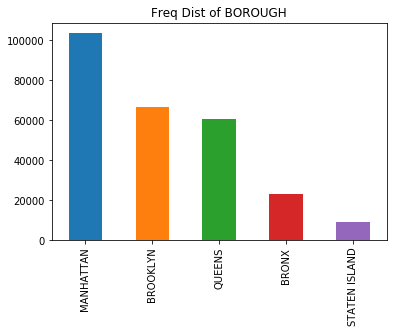

In [174]:
#creating a bar plot of the 'BOROUGH' variable's value counts
df1['BOROUGH'].value_counts().plot.bar(title = "Freq Dist of BOROUGH");

Based on above, there are 103723 of inspected restaurants' records in Manhattan, which is the largest counts, and there are 9234 of inspected restaurants' records in STATEN ISLAND which is the smallest counts in the dataset.

### Distribution of 'RESTAURANT'

In [175]:
#checking the RESTAURANT column summary information
df1['RESTAURANT'].describe()

count             263751
unique             20640
top       DUNKIN' DONUTS
freq                2438
Name: RESTAURANT, dtype: object

In [176]:
#checking unique values in RESTAURANT column
df1['RESTAURANT'].unique()

array(["DENINO'S PIZZERIA TAVERN", "BUDDY'S WONDER BAR",
       'ASTRO RESTAURANT', ..., 'HALO BISTRO CAFE', 'GRUIT',
       'WHISTLE & FIZZ'], dtype=object)

In [177]:
#getting the value counts for the 'RESTAURANT' variable, which is categorical data type.
df1['RESTAURANT'].value_counts()

DUNKIN' DONUTS                             2438
SUBWAY                                     2014
STARBUCKS                                  1420
MCDONALD'S                                 1271
KENNEDY FRIED CHICKEN                       904
CROWN FRIED CHICKEN                         732
DUNKIN' DONUTS, BASKIN ROBBINS              710
BURGER KING                                 653
DOMINO'S                                    630
GOLDEN KRUST CARIBBEAN BAKERY & GRILL       557
POPEYES LOUISIANA KITCHEN                   445
KFC                                         420
CHIPOTLE MEXICAN GRILL                      407
DUNKIN DONUTS                               339
LE PAIN QUOTIDIEN                           310
CHECKERS                                    283
VIVI BUBBLE TEA                             259
WENDY'S                                     252
PARIS BAGUETTE                              246
PRET A MANGER                               238
BAREBURGER                              

Since there are total 20640 unique restaurants in the dataset as shown above, I will not plot the bar chart to show the distribution. Dunkin' donuts are the most frequent restaurant in the dataset, followed by Subway, Starbucks, and Mcdonald's.

### Distribution of SCORE

In [178]:
#checking the SCORE column summary information
df1['SCORE'].describe()

count    252774.000000
mean         20.724153
std          15.033151
min          -1.000000
25%          11.000000
50%          16.000000
75%          26.000000
max         166.000000
Name: SCORE, dtype: float64

In [179]:
df1['SCORE'].unique()

array([ 10.,  27.,  13.,   4.,   7.,   9.,   3.,  nan,  12.,  11.,   6.,
        43.,   2.,  18.,  22.,  14.,  19.,  23.,   5.,  15.,  16.,  37.,
        28.,  25.,   8.,  17.,  42.,  32.,  20.,  33.,  79.,  36.,   0.,
        39.,  26.,  34.,  24.,  30.,  21.,  44.,  62.,  29.,  31.,  35.,
        40.,  66.,  41., 109.,  47.,  68.,  45.,  38.,  48.,  65.,  46.,
        57.,  63.,  64.,  56.,  50.,  53.,  49.,  69.,  76.,  55., 117.,
        72.,  73.,  70.,  -1.,  51.,  61.,  52.,  59.,  85.,  58.,  78.,
        71.,  82.,  77.,  74.,  87.,  60.,  67.,  83.,  84.,  54.,  89.,
        90.,  75., 151.,  91., 110.,  81., 120.,  92.,  86., 103.,  94.,
        99., 135., 137.,  80., 115., 111., 124., 114., 116.,  88., 122.,
       101.,  96., 104.,  93., 155., 140.,  98., 141., 112., 119., 132.,
       106.,  97., 105., 102., 152., 100.,  95., 107., 129., 136., 131.,
       108., 166.])

In [180]:
#checking the null values
df1['SCORE'].isnull().any(axis=0)

True

In [181]:
#converting the null values into 0
df1["SCORE"].fillna("0", inplace = True) 

In [182]:
df1.head(2)

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
0,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,10,A
1,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,10,A


In [183]:
#converting SCORE column data type into integer.
df1.SCORE = df1.SCORE.astype(int)

C:\Users\Minyeong\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0.5, 1.0, 'Distribution of SCORE')

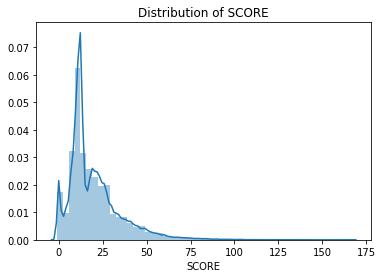

In [189]:
#histogram of 'SCORE' variable which is numeric data type.
sns.distplot(df1.SCORE)
plt.title('Distribution of SCORE')

Text(0.5, 1.0, 'Boxplot of SCORE')

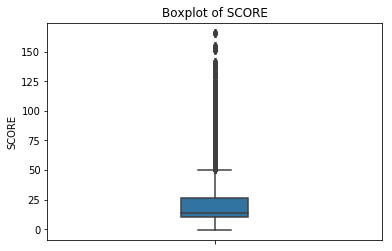

In [190]:
sns.boxplot(df1.SCORE, orient = 'v', width=0.2)
plt.title('Boxplot of SCORE')

In [191]:
#checking the SCORE column summary information
df1['SCORE'].describe()

count    263755.000000
mean         19.861337
std          15.288014
min          -1.000000
25%          10.000000
50%          14.000000
75%          26.000000
max         166.000000
Name: SCORE, dtype: float64

Based on above, SCORE variable is right-skewed as the mean value is larger than the median. The mean score is 19.86, which indicates GRADE B. 

### Distribution of GRADE

In [194]:
#checking the GRADE column summary information
df1['GRADE'].describe()

count     132573
unique         7
top            A
freq      102827
Name: GRADE, dtype: object

In [195]:
#checking unique values in GRADE column
df1['GRADE'].unique()

array(['A', nan, 'B', 'P', 'C', 'Z', 'Not Yet Graded', 'G'], dtype=object)

In [196]:
#getting the value counts for the 'GRADE' variable, which is categorical data type.
df1['GRADE'].value_counts()

A                 102827
B                  16420
C                   5973
Z                   3101
Not Yet Graded      2373
P                   1874
G                      5
Name: GRADE, dtype: int64

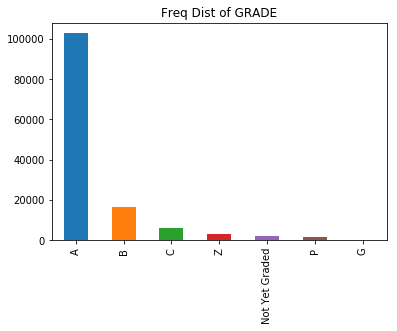

In [197]:
#creating a bar plot of the 'GRADE' variable's value counts
df1['GRADE'].value_counts().plot.bar(title = "Freq Dist of GRADE");

Based on above, 102827 of inspected restaurants received A grade, which is the most frequent grade, and there are some pending grades such as Z, P, G, and "Not Yet Graded". The details about how Health department score and grade was described above, and also it can be found in the link: https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf

### Phase 3: Find the restaurants that received the smallest SCORE and the best GRADE in NYC.

In [205]:
#sanity check
df1.head(2)

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
0,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,10,A
1,DENINO'S PIZZERIA TAVERN,STATEN ISLAND,524,PORT RICHMOND AVENUE,7184429401,Pizza/Italian,2017-05-01,Violations were cited in the following area(s).,Non-food contact surface improperly constructe...,10,A


In [213]:
#checking the INSPECTIN DATE column
df1['INSPECTION DATE'].describe()

count                  263755
unique                    644
top       2019-03-28 00:00:00
freq                      996
first     2017-05-01 00:00:00
last      2019-05-02 00:00:00
Name: INSPECTION DATE, dtype: object

In [209]:
#finding the most recent inspection date
df1['INSPECTION DATE'].sort_values(ascending=False).head()

263754   2019-05-02
263420   2019-05-02
263407   2019-05-02
263408   2019-05-02
263409   2019-05-02
Name: INSPECTION DATE, dtype: datetime64[ns]

Based on above, 2019-05-02 is the most recent INSPECTION DATE in the dataset, so I will use this date to find the "best" restaurant based on the SCORE and GRADE in each borough.

In [217]:
#extracting the data which was inspected on 2019-05-02
df2 = pd.DataFrame(df1.loc[df1['INSPECTION DATE'] == '2019-05-02'])
df2.head(3)

,RESTAURANT,BOROUGH,BUILDING,STREET,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION DESCRIPTION,SCORE,GRADE
263248,THE NEW AMITY RESTAURANT,MANHATTAN,1134,MADISON AVENUE,2128613255,American,2019-05-02,Violations were cited in the following area(s).,Hot food item not held at or above 140Âº F.,9,A
263249,THE NEW AMITY RESTAURANT,MANHATTAN,1134,MADISON AVENUE,2128613255,American,2019-05-02,Violations were cited in the following area(s).,Mechanical or natural ventilation system not p...,9,A
263250,WESTERN BAKERY,QUEENS,22813,MERRICK BOULEVARD,7185253201,Caribbean,2019-05-02,Violations were cited in the following area(s).,Food not cooled by an approved method whereby ...,9,A


In [218]:
#checking the number of rows and columns
df2.shape

(507, 11)

In [239]:
#grouping by 'BOROUGH' and 'RESTAURANT', and then calculating the mean of 'SCORE' column.
grouped_df2 = df2.groupby(['BOROUGH', 'RESTAURANT', 'GRADE'])['SCORE'].agg([('Average Score', 'mean')]).sort_values(by=['Average Score'], ascending=True)
grouped_df2.head(5)

,,,Average Score
BOROUGH,RESTAURANT,GRADE,
MANHATTAN,MILK BAR NOLITA,A,2
STATEN ISLAND,SUBWAY,A,2
BROOKLYN,CROWN FRIED CHICKEN,A,2
QUEENS,CAFE TO GO,A,2
MANHATTAN,NATHAN'S FAMOUS,A,2


Recommended restaurants: Based on above table, MILK BAR NOLITA, SUBWAY, CROWN FRIED CHICKEN, CAFE TO GO, NATHAN'S FAMOUS are the best 5 restaurants in terms of lowest SCORE as of 2019-05-02, which means they are compliant with the City and State food safety regulations.

### Phase 4: Find the restaurants that received the largest SCORE and the worst GRADE in NYC.

In [204]:
#grouping by 'Gender' and 'Candy', and then calculating the mean of 'value' column.
df2 = df1.groupby(['BOROUGH', 'RESTAURANT', 'INSPECTION DATE', 'GRADE'])['SCORE'].agg([('Average Value', 'mean')]).sort_values(by=['INSPECTION DATE'], ascending=False)
df2

Average Value
BOROUGH       RESTAURANT                           INSPECTION DATE GRADE                        
MANHATTAN     BIENANGY'S RINCONCITO DULCE          2019-05-02      A                        12.0
              CPS EVENTS AT THE PLAZA              2019-05-02      A                        13.0
BRONX         THE PIZZA PLACE                      2019-05-02      A                        13.0
              GREAT WALL                           2019-05-02      A                        12.0
BROOKLYN      NAMASTE                              2019-05-02      A                        10.0
              BAR BASIC                            2019-05-02      A                         5.0
MANHATTAN     CAFE FREDERICK HARLEM PARLOR         2019-05-02      A                         9.0
BROOKLYN      GRUIT                                2019-05-02      Not Yet Graded            8.0
MANHATTAN     STARBUCKS                            2019-05-02      A                         2.0
              LUCKY                                2019-05-02      Z                        39.0
              OLLIN RESTAURANT                     2019-05-02      A                        13.0
BROOKLYN      E NOODLE                             2019-05-02      A                        13.0
              EL PASO MEXICAN GRILL                2019-05-02      A                        11.0
STATEN ISLAND WAGNER COLLEGE - HAWK'S NEST         2019-05-02      A                         7.0
              TONY'S BRICK OVEN                    2019-05-02      A                        11.0
MANHATTAN     NEW KING WOK RESTAURANT              2019-05-02      A                         3.0
QUEENS        MR CRAB                              2019-05-02      A                         7.0
BROOKLYN      PROSPECT PIZZA                       2019-05-02      Z                        21.0
MANHATTAN     OOTOYA                               2019-05-02      A                         9.0
BRONX         NEW FRESCO TORTILLAS TOMMY'S KITCHEN 2019-05-02      Z                        21.0
              ACRI CAFE                            2019-05-02      A                         8.0
QUEENS        DUNKIN' DONUTS, BASKIN ROBBINS       2019-05-02      A                         7.0
              TORNADO CREPE                        2019-05-02      Not Yet Graded           19.0
BROOKLYN      MULATA GRILL                         2019-05-02      Z                        27.0
MANHATTAN     CAFFE GRAZIE                         2019-05-02      A                         9.0
              NATHAN'S FAMOUS                      2019-05-02      A                         2.0
              MODERN BREAD AND BAGEL               2019-05-02      A                        13.0
              NORTH SQUARE                         2019-05-02      A                         7.0
QUEENS        ASTORIA PIZZA                        2019-05-02      A                        12.0
BROOKLYN      GREENE GRAPE ANNEX                   2019-05-02      Z                        21.0
...                                                                                          ...
MANHATTAN     THE DRAFT HOUSE                      2017-05-01      A                        12.0
BRONX         ANTONIO'S TRATTORIA                  2017-05-01      A                        11.0
MANHATTAN     WAT'S ON YOUR PLATE                  2017-05-01      C                        28.0
QUEENS        KUM WEI KITCHEN                      2017-05-01      A                        12.0
MANHATTAN     JOOSED BY LLOYD'S                    2017-05-01      C                        33.0
QUEENS        WENDY'S                              2017-05-01      A                        13.0
              LA POLLERA COLORADA                  2017-05-01      A                        11.0
              AJISEN RAMEN                         2017-05-01      B                        23.0
STATEN ISLAND JOHN'S FAMOUS DELI                   2017-05-01      A                        12.0
BROOKLYN 